In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as wb
import matplotlib.pyplot as plt

In [22]:
stocks = ["TSLA", "NFLX", "GOOG", "MSFT"]
data = pd.DataFrame()
for s in stocks:
    data[s] = wb.DataReader(s, data_source='yahoo', start='2012-1-1')['Adj Close']

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1348 entries, 2012-01-03 to 2017-05-11
Data columns (total 4 columns):
TSLA    1348 non-null float64
NFLX    1348 non-null float64
GOOG    1348 non-null float64
MSFT    1348 non-null float64
dtypes: float64(4)
memory usage: 52.7 KB


In [24]:
data.head()

,TSLA,NFLX,GOOG,MSFT
Date,,,,
2012-01-03,28.080000,10.320000,332.373186,23.163887
2012-01-04,27.709999,11.492857,333.806770,23.709020
2012-01-05,27.120001,11.328571,329.176378,23.951303
2012-01-06,26.910000,12.327143,324.685865,24.323379
2012-01-09,27.250000,14.025714,310.919604,24.003220


In [25]:
data.tail()

,TSLA,NFLX,GOOG,MSFT
Date,,,,
2017-05-05,308.350006,156.600006,927.130005,69.000000
2017-05-08,307.190002,156.380005,934.299988,68.940002
2017-05-09,321.260010,157.460007,932.169983,69.040001
2017-05-10,325.220001,160.279999,928.780029,69.309998
2017-05-11,323.100006,158.539993,930.599976,68.459999


# Normalization to 100:

$$
\frac{P_1}{P_0} * 100
$$

In [26]:
data.iloc[0]

TSLA     28.080000
NFLX     10.320000
GOOG    332.373186
MSFT     23.163887
Name: 2012-01-03 00:00:00, dtype: float64

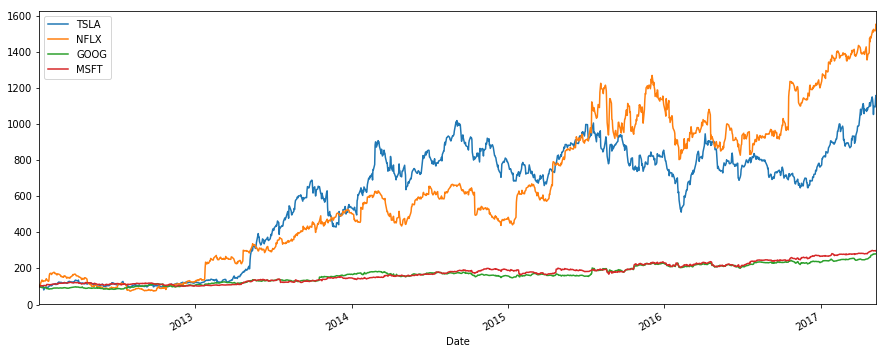

In [27]:
(data / data.iloc[0] * 100).plot(figsize = (15, 6))
plt.show()

# Calculating the Return of a Portfolio

In [28]:
returns = (data / data.shift(1)) -1 # simple returns
returns.head()

,TSLA,NFLX,GOOG,MSFT
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,-0.013177,0.113649,0.004313,0.023534
2012-01-05,-0.021292,-0.014295,-0.013871,0.010219
2012-01-06,-0.007743,0.088146,-0.013642,0.015535
2012-01-09,0.012635,0.137791,-0.042399,-0.013163


In [36]:
weights = np.array([0.45, 0.45, 0.05, 0.05])
np.dot(returns, weights)

array([        nan,  0.04660486, -0.01619655, ...,  0.02367739,
        0.01361977, -0.00833382])

In [37]:
annual_returns = returns.mean() * 250
annual_returns

TSLA    0.575307
NFLX    0.645555
GOOG    0.216550
MSFT    0.226664
dtype: float64

In [38]:
annual = np.dot(annual_returns, weights)

In [39]:
portfolio = str(round(annual, 5) * 100) + "%"
print(portfolio)

57.155%
